## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
# your code here
data.isna().sum()
# категориальные - status, credit history, purpose, personal_status_sex, other debtors, present_residence, property, other_instsallment_plans, housing, job     
# количественные - duration, amount, age
# бинарные - telephone, foreign_worker, credit_risk
# порядковые - savings, employment_duration, installment_rate, number_credits, people_liable

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [4]:
# your code here
data.groupby("purpose")["amount"].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [5]:
# your code here
data.age[(data.housing=="rent") & (data.age < 30)].count() / data.age[data.housing=="rent"].count()

0.3445378151260504

In [6]:
data.age[(data.housing=="rent") & (data.age > 40)].count() / data.age[data.housing=="rent"].count()

0.25910364145658266

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [7]:
# your code here
data.age[(data.foreign_worker=="yes") & ((data.number_credits=="4-5") | (data.number_credits==">=6"))].count()

1

### Задание 6 (1 балл)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

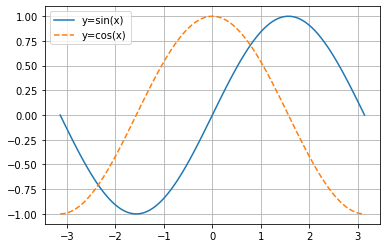

In [9]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)
z = np.cos(x)
plt.plot(x, y, label='y=sin(x)')
plt.plot(x, z, linestyle = '--', label='y=cos(x)')
plt.legend(loc='upper left')
plt.grid()

In [10]:
# your code here

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [11]:
import matplotlib.pyplot as plt

In [12]:
data['num_good'] = data.credit_risk=='good'
data['num_bad'] = data.credit_risk=='bad'

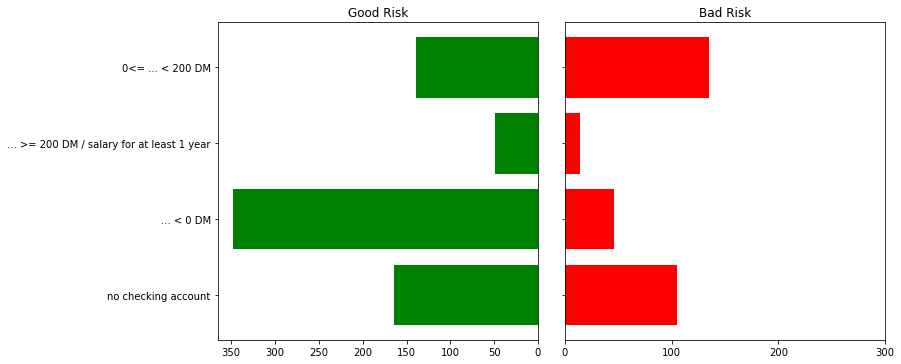

In [13]:
fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()
column0 = data.groupby("status")["num_good"].sum()
column1 = data.groupby("status")["num_bad"].sum()
axes[0].barh(data.status.unique(), column0, color='green')
axes[0].set_title('Good Risk')
axes[0].invert_xaxis() 
axes[1].barh(data.status.unique(), column1, color='red')
axes[1].set_title('Bad Risk')
axes[1].set_xticks([0, 100, 200, 300])

In [14]:
# your code here

### Задание 8  (0.5 балла)

In [15]:
import seaborn as sns
from matplotlib.pyplot import figure

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

In [16]:
data['count'] = np.ones_like(data.age)
data.count
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,num_good,num_bad,count
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,for free,1,skilled employee/official,0 to 2,no,no,good,True,False,1
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,for free,2-3,skilled employee/official,3 or more,no,no,good,True,False,1
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,for free,1,unskilled - resident,0 to 2,no,no,good,True,False,1
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,for free,2-3,unskilled - resident,3 or more,no,yes,good,True,False,1
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,rent,2-3,unskilled - resident,0 to 2,no,yes,good,True,False,1


<AxesSubplot:xlabel='savings', ylabel='count'>

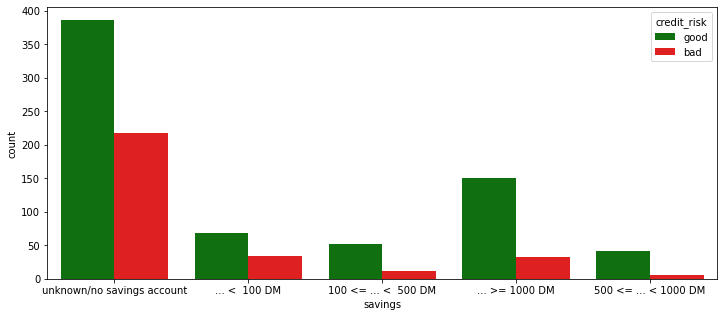

In [17]:
figure(figsize=(12, 5))
sns.barplot(x="savings", y='count', hue="credit_risk", data=data, estimator=sum, palette={"good": "green", "bad": "red"})

In [18]:
# your code here

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<AxesSubplot:xlabel='savings', ylabel='age'>

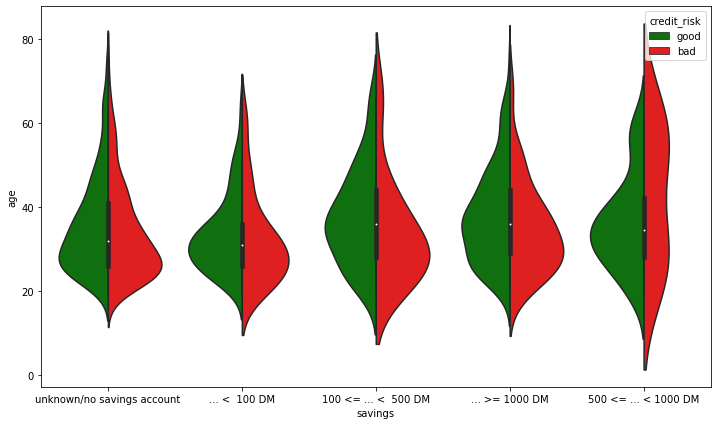

In [19]:
figure(figsize=(12, 7))
sns.violinplot(x="savings", y="age", hue="credit_risk", data=data, split=True, palette={"good": "green", "bad": "red"})

In [20]:
# your code here

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

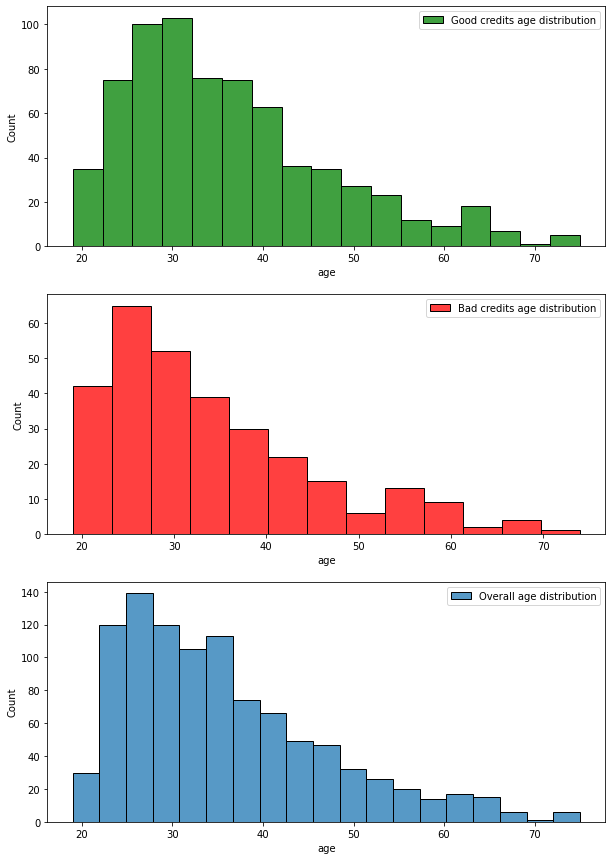

In [21]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
sns.histplot(x=data.age[data.credit_risk=='good'], data=data, ax=axs[0], color='green', label='Good credits age distribution')
sns.histplot(x=data.age[data.credit_risk=='bad'], data=data, ax=axs[1], color='red', label='Bad credits age distribution')
sns.histplot(x='age', data=data, ax=axs[2], label='Overall age distribution')
axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

In [22]:
# your code here

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

<AxesSubplot:xlabel='amount', ylabel='duration'>

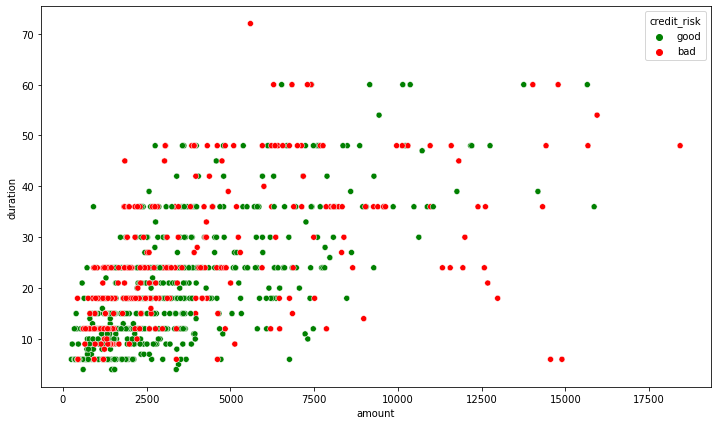

In [23]:
figure(figsize=(12, 7))
sns.scatterplot(x="amount", y="duration", hue="credit_risk", data=data, palette={"good": "green", "bad": "red"})

In [24]:
# your code here

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

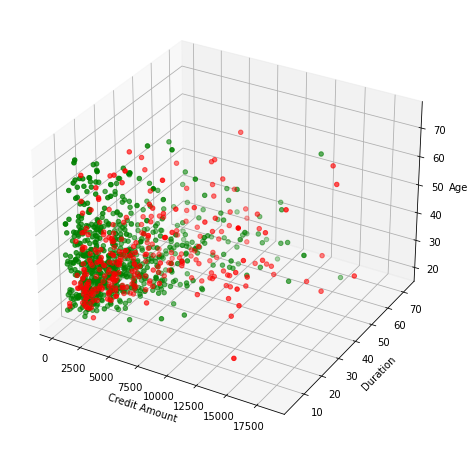

In [25]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(projection = '3d') 
x1 = data.amount[data.credit_risk=='good']
y1 = data.duration[data.credit_risk=='good']
z1 = data.age[data.credit_risk=='good']


x2 = data.amount[data.credit_risk=='bad']
y2 = data.duration[data.credit_risk=='bad']
z2 = data.age[data.credit_risk=='bad']


ax.set_xlabel("Credit Amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")
ax.scatter3D(x1, y1, z1, color='green')
ax.scatter3D(x2, y2, z2, color='red')

In [26]:
# your code here

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [27]:
# your code here
data.isna().sum()
# категориальные - status, credit history, purpose, savings, employment_duration, installment_rate, personal_status_sex, other debtors, present_residence, property, other_instsallment_plans, housing, number_credits, job, people_liable     
# количественные - duration, amount, age
# бинарные - telephone, foreign_worker, credit_risk

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
num_good                   0
num_bad                    0
count                      0
dtype: int64

In [28]:
# your code here
data.telephone = data.telephone.apply(lambda x: 1 if x == "yes (under customer name)" else 0)
data.foreign_worker = data.foreign_worker.apply(lambda x: 1 if x == "yes" else 0)
data.credit_risk = data.credit_risk.apply(lambda x: 1 if x == "good" else 0)

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [31]:
def predict(Xtest: np.array) -> np.array:
    return np.ones(len(Xtest))

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

0.66